<a href="https://colab.research.google.com/github/BAEK-SEUNGYUN/modu_deep/blob/main/modu_wine_best_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 베스트 모델 만들기

## 와인의 종류 예측하기 : 데이터 확인과 실행



In [81]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping

import pandas as pd
import numpy
import tensorflow as tf
import matplotlib.pyplot as plt

In [82]:
# seed 값 설정
numpy.random.seed(3)
tf.random.set_seed(3)

In [83]:
# wine 데이터를 불러온다.
df_pre =pd.read_csv('/content/drive/MyDrive/dataset/wine.csv',header=None)

In [84]:
df = df_pre.sample(frac=1) # frac=1 -> 원본 100%를 불러오라는 뜻/ frac=0.5였으면 50%만

In [85]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
6245,5.9,0.180,0.28,1.0,0.037,24.0,88.0,0.99094,3.29,0.55,10.65,7,0
486,10.2,0.670,0.39,1.9,0.054,6.0,17.0,0.99760,3.17,0.47,10.00,5,1
273,8.4,0.715,0.20,2.4,0.076,10.0,38.0,0.99735,3.31,0.64,9.40,5,1
1993,6.8,0.370,0.51,11.8,0.044,62.0,163.0,0.99760,3.19,0.44,8.80,5,0
885,8.9,0.750,0.14,2.5,0.086,9.0,30.0,0.99824,3.34,0.64,10.50,5,1


13개의 정보가 있다.

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 6245 to 5994
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       6497 non-null   float64
 1   1       6497 non-null   float64
 2   2       6497 non-null   float64
 3   3       6497 non-null   float64
 4   4       6497 non-null   float64
 5   5       6497 non-null   float64
 6   6       6497 non-null   float64
 7   7       6497 non-null   float64
 8   8       6497 non-null   float64
 9   9       6497 non-null   float64
 10  10      6497 non-null   float64
 11  11      6497 non-null   int64  
 12  12      6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


In [87]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.246114
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


6496개의 샘플이 있다.

- 0 - 주석산농도
- 1 - 아세트산 농도
- 2 - 구연산 농도
- 3 - 잔류 당분 농도
- 4 - 염화나트륨 농도
- 5 - 유리 아황산 농도
- 6 - 총 아황산 농도
- 7 - 밀도
- 8 - ph
- 9 - 황산칼륨 농도
- 10 - 알코올 도수
- 11 - 와인의 맛(0~10등급)
- 12 - class(1 : 레드와인, 2 : 화이트와인)


In [88]:
# 0~11까지에 해당하는 12개의 정보를 가지고 클래스를 맞추는 과제

dataset = df.values
X = dataset[:, 0:12]
Y = dataset[:, 12]
Y

array([0., 1., 1., ..., 0., 0., 0.])

In [89]:
# 데이터 모델링
# 모델 설정
# 4개의 은닉층을 만들어 각각 30, 12, 8, 1 개의 노드
model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [90]:
# 모델 컴파일
# 이항분류(binary classification)문제 이므로 오차 함수는 binary_crossentropy를 사용, 최적화 함수는 adam
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [91]:
# 모델 실행
model.fit(X, Y, epochs=200, batch_size=200)

Epoch 1/200
33/33 [==============================] - 1s 1ms/step - loss: 0.9045 - accuracy: 0.7450
Epoch 2/200
33/33 [==============================] - 0s 1ms/step - loss: 0.3164 - accuracy: 0.8851
Epoch 3/200
33/33 [==============================] - 0s 1ms/step - loss: 0.2495 - accuracy: 0.9236
Epoch 4/200
33/33 [==============================] - 0s 2ms/step - loss: 0.2317 - accuracy: 0.9254
Epoch 5/200
33/33 [==============================] - 0s 2ms/step - loss: 0.2203 - accuracy: 0.9254
Epoch 6/200
33/33 [==============================] - 0s 2ms/step - loss: 0.2080 - accuracy: 0.9308
Epoch 7/200
33/33 [==============================] - 0s 2ms/step - loss: 0.2027 - accuracy: 0.9334
Epoch 8/200
33/33 [==============================] - 0s 2ms/step - loss: 0.1984 - accuracy: 0.9351
Epoch 9/200
33/33 [==============================] - 0s 2ms/step - loss: 0.1879 - accuracy: 0.9377
Epoch 10/200
33/33 [==============================] - 0s 2ms/step - loss: 0.1918 - accuracy: 0.9356
Epoch 11/

In [92]:
# 결과 출력
print("Accuracy : %.4f" % (model.evaluate(X,Y)[1]))

204/204 [==============================] - 0s 1ms/step - loss: 0.0512 - accuracy: 0.9848
Accuracy : 0.9848


## 모델 업데이트 하기

모델을 그냥 저장하는 것이 아니라 에포크마다 모델의 정확도를 함께 기록하면서 저장

In [93]:
pwd

'/content/model/model'

In [94]:
ls

01-0.0482.hdf5  101-0.0436.hdf5  14-0.0461.hdf5   37-0.0451.hdf5
02-0.0479.hdf5  131-0.0433.hdf5  142-0.0421.hdf5  43-0.0448.hdf5
09-0.0466.hdf5  133-0.0428.hdf5  31-0.0455.hdf5   80-0.0440.hdf5


In [95]:
import os

MODEL_DIR = './model'   # 모델을 저장하는 폴더
if not os.path.exists(MODEL_DIR):   # 만일 위의 폴더가 존재하지 않으면
  os.mkdir(MODEL_DIR)

modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"

In [96]:
ls

01-0.0482.hdf5  101-0.0436.hdf5  14-0.0461.hdf5   37-0.0451.hdf5  model/
02-0.0479.hdf5  131-0.0433.hdf5  142-0.0421.hdf5  43-0.0448.hdf5
09-0.0466.hdf5  133-0.0428.hdf5  31-0.0455.hdf5   80-0.0440.hdf5


In [97]:
# 모델을 저장하기 위한 케라스의 ModelCheckpoint() 함수

from keras.callbacks import ModelCheckpoint

chcekpointer 변수 -> 이곳에 모니터할 값을 지정

테스트 오차는 케라스 내부에서 val_loss 로 기록(학습 정확도는 acc, 테스트셋 정확도는 val_acc, 학습셋 오차는 loss로 각각 기록된다)

모델이 저장될 곳을 앞서 만든 modelpath로 지정하고 verbose의 값을 1로 정하면 해당 함수의 진행 사항이 출력되고, 0으로 하면 출력되지 않는다.

In [98]:
checkpointer = ModelCheckpoint(filepath=modelpath, mmonitor='val_loss', verbose=1)

In [99]:
# 모델을 학습할 때마다 위에서 정한 checkpointer의 값을 받아 지정된 곳에 모델을 저장
model.fit(X, Y, validation_split=0.2, epochs=200, batch_size=200, verbose=0, callbacks=[checkpointer])


Epoch 00001: saving model to ./model/01-0.0408.hdf5

Epoch 00002: saving model to ./model/02-0.0489.hdf5

Epoch 00003: saving model to ./model/03-0.0429.hdf5

Epoch 00004: saving model to ./model/04-0.0432.hdf5

Epoch 00005: saving model to ./model/05-0.0442.hdf5

Epoch 00006: saving model to ./model/06-0.0440.hdf5

Epoch 00007: saving model to ./model/07-0.0407.hdf5

Epoch 00008: saving model to ./model/08-0.0581.hdf5

Epoch 00009: saving model to ./model/09-0.0537.hdf5

Epoch 00010: saving model to ./model/10-0.0447.hdf5

Epoch 00011: saving model to ./model/11-0.0493.hdf5

Epoch 00012: saving model to ./model/12-0.0414.hdf5

Epoch 00013: saving model to ./model/13-0.0479.hdf5

Epoch 00014: saving model to ./model/14-0.0420.hdf5

Epoch 00015: saving model to ./model/15-0.0444.hdf5

Epoch 00016: saving model to ./model/16-0.0461.hdf5

Epoch 00017: saving model to ./model/17-0.0525.hdf5

Epoch 00018: saving model to ./model/18-0.0674.hdf5

Epoch 00019: saving model to ./model/19-0.051

총 200개의 모델이 model 폴더에 저장

저장된 파일의 이름이 곧 에포크 수와 이때의 테스트셋 오차

이대 ModelCheckpoint() 함수에 모델이 앞서 저장한 모델보다 나아졌을 때만 저장하게끔 하려면 save_best_only 값을 True로 지정

In [100]:
# model 폴더를 다시 비워준다
# https://bigdatapy.tistory.com/198 -> 링크 참조
def removeAllFile(MODEL_DIR):
  if os.path.exists(MODEL_DIR):
    for file in os.scandir(MODEL_DIR):
      os.remove(file.path)
    return 'remove all file'
  else:
    return 'Directory Not Found'

print(removeAllFile(MODEL_DIR))

remove all file


In [101]:
# save_best_only 값을 True 로 지정하여 모델이 앞서 저장한 모델보다 나아졌을 때만 저장
checkpointer = ModelCheckpoint(filepath=modelpath, mmonitor='val_loss', verbose=1, save_best_only=True)

In [102]:
model.fit(X, Y, validation_split=0.2, epochs=200, batch_size=200, verbose=0, callbacks=[checkpointer])


Epoch 00001: val_loss improved from inf to 0.04257, saving model to ./model/01-0.0426.hdf5

Epoch 00002: val_loss improved from 0.04257 to 0.03922, saving model to ./model/02-0.0392.hdf5

Epoch 00003: val_loss improved from 0.03922 to 0.03819, saving model to ./model/03-0.0382.hdf5

Epoch 00004: val_loss improved from 0.03819 to 0.03739, saving model to ./model/04-0.0374.hdf5

Epoch 00005: val_loss did not improve from 0.03739

Epoch 00006: val_loss improved from 0.03739 to 0.03678, saving model to ./model/06-0.0368.hdf5

Epoch 00007: val_loss did not improve from 0.03678

Epoch 00008: val_loss did not improve from 0.03678

Epoch 00009: val_loss did not improve from 0.03678

Epoch 00010: val_loss did not improve from 0.03678

Epoch 00011: val_loss did not improve from 0.03678

Epoch 00012: val_loss did not improve from 0.03678

Epoch 00013: val_loss did not improve from 0.03678

Epoch 00014: val_loss did not improve from 0.03678

Epoch 00015: val_loss did not improve from 0.03678

Epo

나아졌을때만 저장을 하다보니 이전의 200개가 저장된거에 비해 이번에는 4개만 저장이 되었다.

In [103]:
cd model

/content/model/model/model


In [104]:
ls  # 4개의 모델만이 저장

01-0.0426.hdf5  04-0.0374.hdf5   158-0.0333.hdf5  41-0.0357.hdf5
02-0.0392.hdf5  06-0.0368.hdf5   26-0.0366.hdf5   74-0.0356.hdf5
03-0.0382.hdf5  107-0.0338.hdf5  35-0.0357.hdf5   83-0.0349.hdf5


## 그래프로 확인하기


학습을 반복하는 횟수가 너무 적어도 안되고 너무 많아도 과적합을 일으키는 문제가 있다.

모델의 학습시간에 따른 정확도와 테스트 결과를 그래프를 통해 확인해보자

In [112]:
# seed 값 설정
numpy.random.seed(3)
tf.random.set_seed(3)

In [113]:
df = df_pre.sample(frac=0.15)  # 샘플의 15%만 가져온다.

In [110]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
607,8.8,0.48,0.41,3.3,0.092,26.0,52.0,0.99820,3.31,0.53,10.5,6,1
845,6.4,0.64,0.21,1.8,0.081,14.0,31.0,0.99689,3.59,0.66,9.8,5,1
3111,7.3,0.22,0.49,9.4,0.034,29.0,134.0,0.99390,2.99,0.32,11.0,7,0
4552,6.0,0.28,0.25,1.8,0.042,8.0,108.0,0.99290,3.08,0.55,9.0,5,0
4073,6.1,0.27,0.31,1.5,0.035,17.0,83.0,0.99076,3.32,0.44,11.1,7,0


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 975 entries, 607 to 5120
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       975 non-null    float64
 1   1       975 non-null    float64
 2   2       975 non-null    float64
 3   3       975 non-null    float64
 4   4       975 non-null    float64
 5   5       975 non-null    float64
 6   6       975 non-null    float64
 7   7       975 non-null    float64
 8   8       975 non-null    float64
 9   9       975 non-null    float64
 10  10      975 non-null    float64
 11  11      975 non-null    int64  
 12  12      975 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 106.6 KB


In [114]:
dataset = df.values
X = dataset[:, 0:12]
Y = dataset[:, 12]

In [115]:
# 모델 실행 및 저장
history = model.fit(X, Y, validation_split=0.33, epochs=3500, batch_size=500)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Epoch 1001/3500
2/2 [==============================] - 0s 51ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.0936 - val_accuracy: 0.9837
Epoch 1002/3500
2/2 [==============================] - 0s 89ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.0972 - val_accuracy: 0.9837
Epoch 1003/3500
2/2 [==============================] - 0s 44ms/step - loss: 0.0034 - accuracy: 0.9985 - val_loss: 0.0961 - val_accuracy: 0.9832
Epoch 1004/3500
2/2 [==============================] - 0s 51ms/step - loss: 0.0029 - accuracy: 0.9985 - val_loss: 0.0920 - val_accuracy: 0.9823
Epoch 1005/3500
2/2 [==============================] - 0s 41ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.0893 - val_accuracy: 0.9828
Epoch 1006/3500
2/2 [==============================] - 0s 44ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.0892 - val_accuracy: 0.9837
Epoch 1007/3500
2/2 [==============================] - 0s 51ms/step - loss: 0.0035 - accuracy: 0.998

모델이 학습되는 과정을 history 변수를 만들어 저장

긴 학습의 예를 보기 위해 3500으로 조정하고 시간이 너무 오래 걸리지 않도록 sample을 frac=0.15 / 15% 불러왔으며, 배치 크기는 500으로 늘려 한 번 딥러닝 가동할 때 더 많이 입력 되게했다. 불러온 샘플 중 33%는 테스트셋으로 사용하였다.

그래프로 표현하기 위한 라이브러리를 불러오고 오차와 정확도의 값을 정한다.

y_vloss 에 테스트셋(33%)으로 실험한 결과의 오차 값을 저장하고 y_acc에 학습셋(67%)으로 측정한 정확도의 값을 저장한다.

In [116]:
import matplotlib.pyplot as plt

# y_vloss에 테스트셋으로 실험결과의 오차값을 저장
y_vloss = history.history['val_loss']

# y_acc = history.history['acc']   acc -> accuracy 로 바꾸어 줘야 한다.
# y_acc에 학습셋으로 측정한 정확도의 값을 저장
y_acc = history.history['accuracy']

In [117]:
x_len = numpy.arange(len(y_acc))

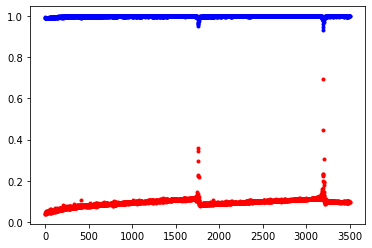

In [119]:
# 오차를 빨간색, 정화도를 파란색으로 표시
plt.plot(x_len, y_vloss, "o", c="red", markersize=3)
plt.plot(x_len, y_acc, "o", c="blue", markersize=3)

plt.show()

이전에 학습이 여러번 진행이 되어서 그래프가 유의미하게 나오지 않는다.

새로 파일을 생성해서 시도를 해봐야겠다.